In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
finance_sectors=pd.read_excel("Financial Performance of Sectors.xlsx")
finance_sectors

Segment                   Country    Product Discount Band  \
0          Government                    Canada  Carretera           NaN   
1          Government                   Germany  Carretera           NaN   
2           Midmarket                    France  Carretera           NaN   
3           Midmarket                   Germany  Carretera           NaN   
4           Midmarket                    Mexico  Carretera           NaN   
..                ...                       ...        ...           ...   
695    Small Business                    France   Amarilla          High   
696    Small Business                    Mexico   Amarilla          High   
697        Government                    Mexico    Montana          High   
698        Government                    Canada      Paseo          High   
699  Channel Partners  United States of America        VTT          High   

     Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
0        1618.5                    3          20      32370.0       0.00   
1        1321.0                    3          20      26420.0       0.00   
2        2178.0                    3          15      32670.0       0.00   
3         888.0                    3          15      13320.0       0.00   
4        2470.0                    3          15      37050.0       0.00   
..          ...                  ...         ...          ...        ...   
695      2475.0                  260         300     742500.0  111375.00   
696       546.0                  260         300     163800.0   24570.00   
697      1368.0                    5           7       9576.0    1436.40   
698       723.0                   10           7       5061.0     759.15   
699      1806.0                  250          12      21672.0    3250.80   

         Sales      COGS    Profit       Date  Month Number Month Name  Year  
0     32370.00   16185.0  16185.00 2014-01-01             1    January  2014  
1     26420.00   13210.0  13210.00 2014-01-01             1    January  2014  
2     32670.00   21780.0  10890.00 2014-06-01             6       June  2014  
3     13320.00    8880.0   4440.00 2014-06-01             6       June  2014  
4     37050.00   24700.0  12350.00 2014-06-01             6       June  2014  
..         ...       ...       ...        ...           ...        ...   ...  
695  631125.00  618750.0  12375.00 2014-03-01             3      March  2014  
696  139230.00  136500.0   2730.00 2014-10-01            10    October  2014  
697    8139.60    6840.0   1299.60 2014-02-01             2   February  2014  
698    4301.85    3615.0    686.85 2014-04-01             4      April  2014  
699   18421.20    5418.0  13003.20 2014-05-01             5        May  2014  

[700 rows x 16 columns]

# **Exploratory Data Analysis (EDA)**

In [3]:
# replace Null values in Discount Band with "No Discount"
finance_sectors['Discount Band'].fillna('No Discount', inplace=True)

In [4]:
finance_sectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [5]:
finance_sectors.shape

(700, 16)

In [6]:
finance_sectors.size

11200

In [7]:
finance_sectors.describe()

Units Sold  Manufacturing Price  Sale Price   Gross Sales  \
count   700.000000           700.000000  700.000000  7.000000e+02   
mean   1608.294286            96.477143  118.428571  1.827594e+05   
min     200.000000             3.000000    7.000000  1.799000e+03   
25%     905.000000             5.000000   12.000000  1.739175e+04   
50%    1542.500000            10.000000   20.000000  3.798000e+04   
75%    2229.125000           250.000000  300.000000  2.790250e+05   
max    4492.500000           260.000000  350.000000  1.207500e+06   
std     867.427859           108.602612  136.775515  2.542623e+05   

           Discounts         Sales           COGS         Profit  \
count     700.000000  7.000000e+02     700.000000     700.000000   
mean    13150.354629  1.696091e+05  145475.211429   24133.860371   
min         0.000000  1.655080e+03     918.000000  -40617.500000   
25%       800.320000  1.592800e+04    7490.000000    2805.960000   
50%      2585.250000  3.554020e+04   22506.250000    9242.200000   
75%     15956.343750  2.610775e+05  245607.500000   22662.000000   
max    149677.500000  1.159200e+06  950625.000000  262200.000000   
std     22962.928775  2.367263e+05  203865.506118   42760.626563   

                      Date  Month Number         Year  
count                  700    700.000000   700.000000  
mean   2014-04-28 21:36:00      7.900000  2013.750000  
min    2013-09-01 00:00:00      1.000000  2013.000000  
25%    2013-12-24 06:00:00      5.750000  2013.750000  
50%    2014-05-16 12:00:00      9.000000  2014.000000  
75%    2014-09-08 12:00:00     10.250000  2014.000000  
max    2014-12-01 00:00:00     12.000000  2014.000000  
std                    NaN      3.377321     0.433322

In [8]:
finance_sectors.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [9]:
finance_sectors['Segment'].value_counts()

Segment
Government          300
Midmarket           100
Channel Partners    100
Enterprise          100
Small Business      100
Name: count, dtype: int64

In [10]:
finance_sectors['Country'].value_counts()

Country
Canada                      140
Germany                     140
France                      140
Mexico                      140
United States of America    140
Name: count, dtype: int64

In [11]:
print("Most active Country in business:",finance_sectors["Country"].value_counts().idxmax())

Most active Country in business: Canada


In [12]:
print("Segment with least sales:",finance_sectors['Segment'].value_counts().idxmin())

Segment with least sales: Midmarket


In [13]:
# Product with the highest manufacturing price.
highest_price_product, highest_price = finance_sectors[finance_sectors['Manufacturing Price'] == finance_sectors['Manufacturing Price'].max()][['Product', 'Manufacturing Price']].values[0]
print(f"Product with the highest manufacturing price: {highest_price_product}, Price: {highest_price}")

Product with the highest manufacturing price: Amarilla, Price: 260


In [14]:
# Segment with the lowest COGS.
lowest_cogs_segment = finance_sectors.loc[finance_sectors['COGS'].idxmin(), 'Segment']
lowest_cogs_value = finance_sectors.loc[finance_sectors['COGS'].idxmin(), 'COGS']

print(f"Segment with the lowest COGS: {lowest_cogs_segment}, COGS value: {lowest_cogs_value}")

Segment with the lowest COGS: Channel Partners, COGS value: 918.0


In [15]:
# Country with the best Sale Price.
best_sale_price_country = finance_sectors.groupby('Country')['Sale Price'].mean().sort_values(ascending=False).index[0]
best_sale_price_value = finance_sectors.groupby('Country')['Sale Price'].mean().sort_values(ascending=False).values[0]

print(f"Country with the best selling price: {best_sale_price_country}, Average selling price: {np.round(best_sale_price_value,2)}")

Country with the best selling price: Canada, Average selling price: 118.43


# **Data Visualization**

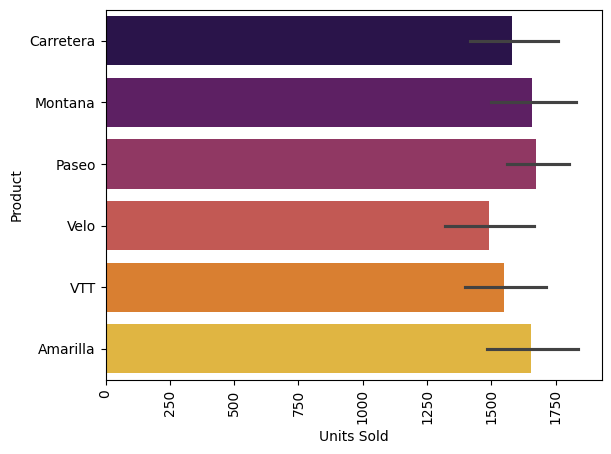

In [16]:
# Products' Unit Sales
sns.barplot(x = 'Units Sold', y = 'Product' , data = finance_sectors, palette="inferno", hue='Product', legend=False)
plt.xticks(rotation=90)
plt.show()

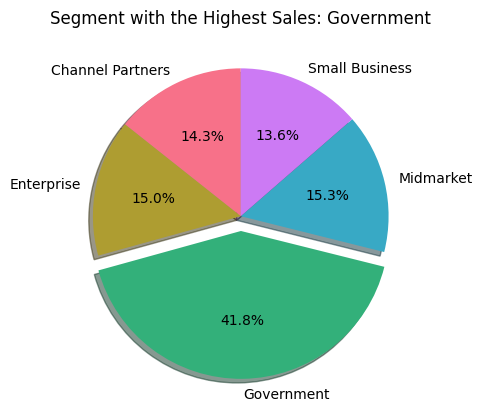

In [17]:
# Pie chart for the Segment with highest Sales.
sales_by_segment = finance_sectors.groupby('Segment')['Units Sold'].sum()
highest_sales_segment = sales_by_segment.idxmax()
highest_sales_value = sales_by_segment.max()

labels = sales_by_segment.index.to_list()
colors = sns.color_palette('husl', len(labels))

explode = [0] * len(labels)
explode[labels.index(highest_sales_segment)] = 0.1

plt.pie(sales_by_segment, labels=labels, colors=colors, autopct='%.1f%%', explode=explode, shadow=True, startangle=90)
plt.title(f'Segment with the Highest Sales: {highest_sales_segment}')
plt.show()

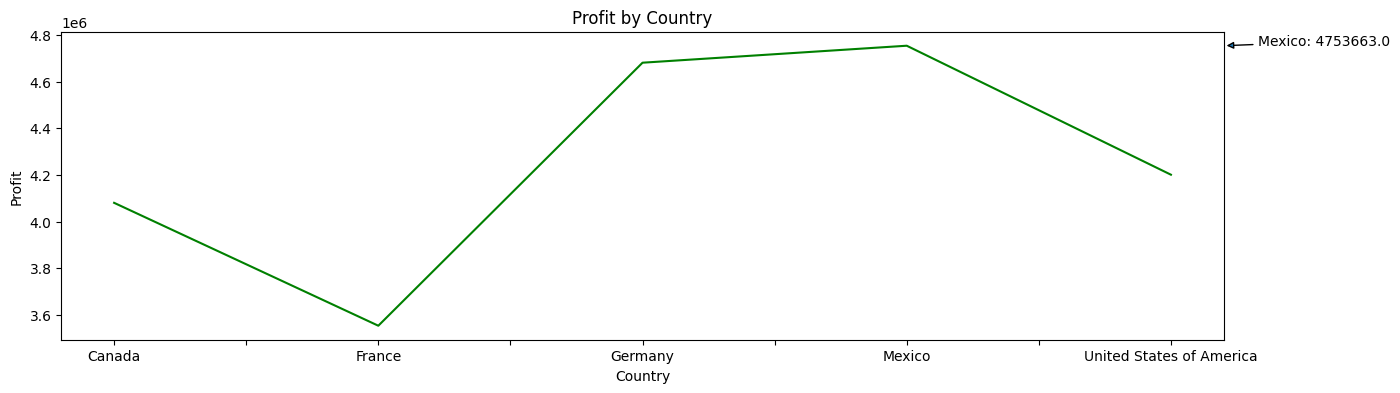

In [18]:
# Line graph to analyze the Country with high profits
finance_sectors['Profit'] = finance_sectors['Units Sold'] * (finance_sectors['Sale Price'] - finance_sectors['Manufacturing Price'])
profit_by_country = finance_sectors.groupby('Country')['Profit'].sum()

highest_profit_country = profit_by_country.idxmax()

plt.figure(figsize=(15,4))
profit_by_country.plot(kind='line', color='green')
plt.title('Profit by Country')
plt.xlabel('Country')
plt.ylabel('Profit')

# Add annotation for the country with the highest profit
plt.annotate(f'{highest_profit_country}: {profit_by_country[highest_profit_country]}', xy=(1, profit_by_country[highest_profit_country]), xytext=(25, 0),
             xycoords=('axes fraction', 'data'), textcoords='offset points',
             arrowprops=dict(arrowstyle='-|>'))

plt.show()

<Figure size 3000x1000 with 0 Axes>

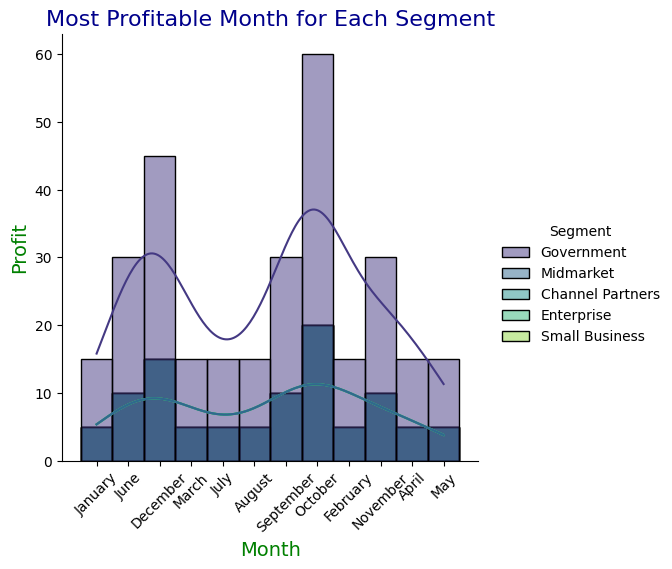

In [19]:
# A displot showing the most Profitable Month/s for Segments
plt.figure(figsize=(30,10))
sns.displot(x="Month Name", hue="Segment", data=finance_sectors, palette="viridis", kde=True)
plt.title("Most Profitable Month for Each Segment", fontsize=16, color='darkblue')
plt.xlabel("Month", fontsize=14, color='green')
plt.ylabel("Profit", fontsize=14, color='green')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

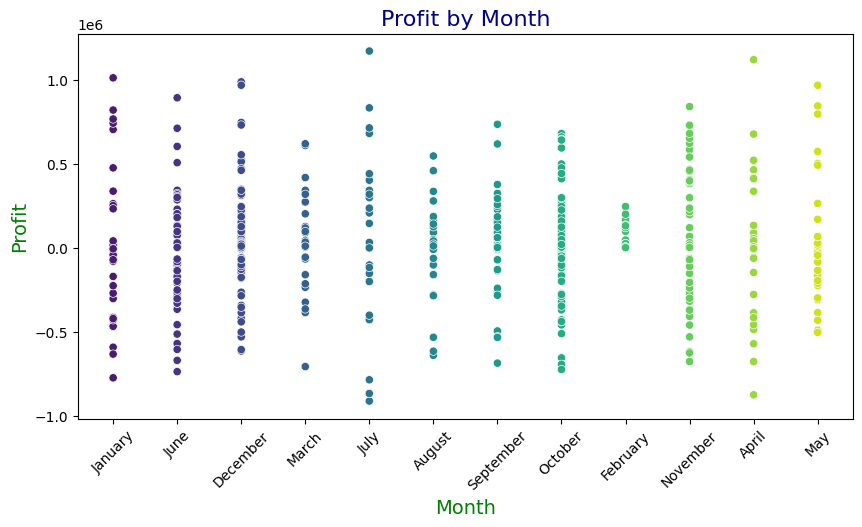

In [20]:
# Profits by Month.
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Month Name", y="Profit", data=finance_sectors, hue="Month Name", palette="viridis",legend=False)
plt.title("Profit by Month", fontsize=16, color="darkblue")
plt.xlabel("Month", fontsize=14, color="green")
plt.ylabel("Profit", fontsize=14, color="green")
plt.xticks(rotation=45)
plt.show()

# **Clustering**

In [21]:
finance_sectors.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [22]:
finance_cluster = finance_sectors[['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'COGS', 'Profit']]
finance_cluster

Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
0        1618.5                    3          20      32370.0       0.00   
1        1321.0                    3          20      26420.0       0.00   
2        2178.0                    3          15      32670.0       0.00   
3         888.0                    3          15      13320.0       0.00   
4        2470.0                    3          15      37050.0       0.00   
..          ...                  ...         ...          ...        ...   
695      2475.0                  260         300     742500.0  111375.00   
696       546.0                  260         300     163800.0   24570.00   
697      1368.0                    5           7       9576.0    1436.40   
698       723.0                   10           7       5061.0     759.15   
699      1806.0                  250          12      21672.0    3250.80   

         COGS    Profit  
0     16185.0   27514.5  
1     13210.0   22457.0  
2     21780.0   26136.0  
3      8880.0   10656.0  
4     24700.0   29640.0  
..        ...       ...  
695  618750.0   99000.0  
696  136500.0   21840.0  
697    6840.0    2736.0  
698    3615.0   -2169.0  
699    5418.0 -429828.0  

[700 rows x 7 columns]

# KMeans Clustering

In [23]:
from sklearn.preprocessing import StandardScaler
ss_k=StandardScaler()
ss_dfk=pd.DataFrame(ss_k.fit_transform(finance_cluster),columns=finance_cluster.columns)
ss_dfk

Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
0      0.011774            -0.861342   -0.720150    -0.591897  -0.573087   
1     -0.331439            -0.861342   -0.720150    -0.615314  -0.573087   
2      0.657246            -0.861342   -0.756733    -0.590716  -0.573087   
3     -0.830973            -0.861342   -0.756733    -0.666873  -0.573087   
4      0.994114            -0.861342   -0.756733    -0.573477  -0.573087   
..          ...                  ...         ...          ...        ...   
695    0.999882             1.506776    1.328463     2.203004   4.280590   
696   -1.225524             1.506776    1.328463    -0.074620   0.497663   
697   -0.277217            -0.842913   -0.815265    -0.681608  -0.510489   
698   -1.021327            -0.796841   -0.815265    -0.699378  -0.540004   
699    0.228085             1.414631   -0.778682    -0.634001  -0.431419   

         COGS    Profit  
0   -0.634647 -0.009592  
1   -0.649251 -0.026497  
2   -0.607183 -0.014200  
3   -0.670505 -0.065940  
4   -0.592850 -0.002488  
..        ...       ...  
695  2.323165  0.229341  
696 -0.044057 -0.028559  
697 -0.680519 -0.092412  
698 -0.696350 -0.108807  
699 -0.687499 -1.538218  

[700 rows x 7 columns]

In [24]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5,random_state=42)
km.fit(ss_dfk)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [25]:
set(km.labels_)
finance_cluster["cluster_ID_K"]=km.labels_
finance_cluster

<ipython-input-25-1784a85989b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finance_cluster["cluster_ID_K"]=km.labels_


Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
0        1618.5                    3          20      32370.0       0.00   
1        1321.0                    3          20      26420.0       0.00   
2        2178.0                    3          15      32670.0       0.00   
3         888.0                    3          15      13320.0       0.00   
4        2470.0                    3          15      37050.0       0.00   
..          ...                  ...         ...          ...        ...   
695      2475.0                  260         300     742500.0  111375.00   
696       546.0                  260         300     163800.0   24570.00   
697      1368.0                    5           7       9576.0    1436.40   
698       723.0                   10           7       5061.0     759.15   
699      1806.0                  250          12      21672.0    3250.80   

         COGS    Profit  cluster_ID_K  
0     16185.0   27514.5             4  
1     13210.0   22457.0             4  
2     21780.0   26136.0             2  
3      8880.0   10656.0             4  
4     24700.0   29640.0             2  
..        ...       ...           ...  
695  618750.0   99000.0             3  
696  136500.0   21840.0             0  
697    6840.0    2736.0             4  
698    3615.0   -2169.0             4  
699    5418.0 -429828.0             1  

[700 rows x 8 columns]

In [26]:
finance_cluster.sort_values(by="cluster_ID_K")

Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
255       602.0                  120         350     210700.0   10535.00   
109      1728.0                   10         300     518400.0   10368.00   
339      1404.0                   10         300     421200.0   29484.00   
199       274.0                   10         350      95900.0    3836.00   
493       853.0                  260         300     255900.0   25590.00   
..          ...                  ...         ...          ...        ...   
321      1582.0                  120           7      11074.0     775.18   
320       547.0                  120           7       3829.0     268.03   
86        663.0                  120         125      82875.0     828.75   
85        923.0                  120         125     115375.0    1153.75   
0        1618.5                    3          20      32370.0       0.00   

         COGS    Profit  cluster_ID_K  
255  156520.0  138460.0             0  
109  432000.0  501120.0             0  
339  351000.0  407160.0             0  
199   71240.0   93160.0             0  
493  213250.0   34120.0             0  
..        ...       ...           ...  
321    7910.0 -178766.0             4  
320    2735.0  -61811.0             4  
86    79560.0    3315.0             4  
85   110760.0    4615.0             4  
0     16185.0   27514.5             4  

[700 rows x 8 columns]

In [27]:
finance_cluster[finance_cluster["cluster_ID_K"]==2]

Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
2        2178.0                    3          15      32670.0       0.00   
4        2470.0                    3          15      37050.0       0.00   
7        2518.0                    5          12      30216.0       0.00   
8        1899.0                    5          20      37980.0       0.00   
10       2470.0                    5          15      37050.0       0.00   
..          ...                  ...         ...          ...        ...   
642      1731.0                   10           7      12117.0    1696.38   
644      2222.0                   10          12      26664.0    3732.96   
672      2535.0                   10           7      17745.0    2661.75   
674      2559.0                   10          15      38385.0    5757.75   
683      2826.0                  120          15      42390.0    6358.50   

        COGS    Profit  cluster_ID_K  
2    21780.0   26136.0             2  
4    24700.0   29640.0             2  
7     7554.0   17626.0             2  
8    18990.0   28485.0             2  
10   24700.0   24700.0             2  
..       ...       ...           ...  
642   8655.0   -5193.0             2  
644   6666.0    4444.0             2  
672  12675.0   -7605.0             2  
674  25590.0   12795.0             2  
683  28260.0 -296730.0             2  

[157 rows x 8 columns]

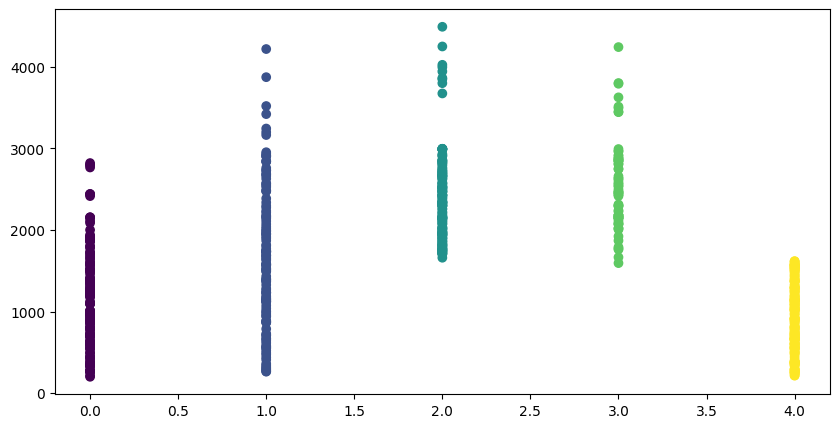

In [28]:
fig=plt.figure(figsize=(10,5))
plt.scatter(finance_cluster["cluster_ID_K"],finance_cluster["Units Sold"],c=km.labels_)

# Heirarchical Clustering

In [29]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [30]:
finance_cluster_norm=pd.DataFrame(normalize(finance_cluster),columns=finance_cluster.columns)
finance_cluster_norm.head()

Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
0    0.035578             0.000066    0.000440     0.711568        0.0   
1    0.035578             0.000081    0.000539     0.711568        0.0   
2    0.046127             0.000064    0.000318     0.691898        0.0   
3    0.046127             0.000156    0.000779     0.691898        0.0   
4    0.046127             0.000056    0.000280     0.691898        0.0   

       COGS    Profit  cluster_ID_K  
0  0.355784  0.604833      0.000088  
1  0.355784  0.604833      0.000108  
2  0.461266  0.553519      0.000042  
3  0.461265  0.553519      0.000208  
4  0.461266  0.553519      0.000037

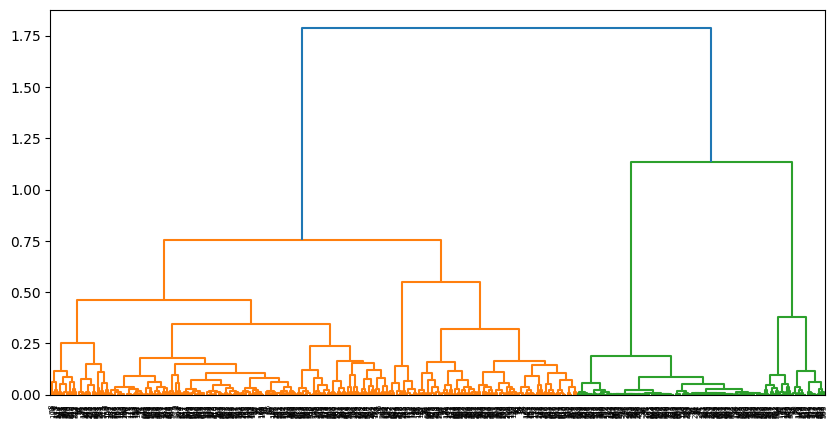

In [31]:
fig=plt.figure(figsize=(10,5))
dend=sch.dendrogram(sch.linkage(finance_cluster_norm,"complete"))

In [32]:
ac=AgglomerativeClustering(n_clusters=6,metric="euclidean",linkage="ward")
ac

AgglomerativeClustering(metric='euclidean', n_clusters=6)

In [33]:
y=pd.DataFrame(ac.fit_predict(finance_cluster_norm),columns=["cluster_ID_y"])
y["cluster_ID_y"].value_counts()

cluster_ID_y
3    168
5    156
0    150
1    144
2     56
4     26
Name: count, dtype: int64

In [34]:
finance_cluster["cluster_ID_H"]=ac.labels_
finance_cluster.head()

<ipython-input-34-870b2e57435c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finance_cluster["cluster_ID_H"]=ac.labels_


Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
0      1618.5                    3          20      32370.0        0.0   
1      1321.0                    3          20      26420.0        0.0   
2      2178.0                    3          15      32670.0        0.0   
3       888.0                    3          15      13320.0        0.0   
4      2470.0                    3          15      37050.0        0.0   

      COGS   Profit  cluster_ID_K  cluster_ID_H  
0  16185.0  27514.5             4             0  
1  13210.0  22457.0             4             0  
2  21780.0  26136.0             2             0  
3   8880.0  10656.0             4             0  
4  24700.0  29640.0             2             0

In [35]:
finance_cluster[finance_cluster["cluster_ID_H"]==5].tail()

Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
669       546.0                    5         300     163800.0   24570.00   
673      2851.0                   10         350     997850.0  149677.50   
676      1085.0                   10         125     135625.0   20343.75   
678      2007.0                   10         350     702450.0  105367.50   
679      2151.0                   10         350     752850.0  112927.50   

         COGS    Profit  cluster_ID_K  cluster_ID_H  
669  136500.0  161070.0             0             5  
673  741260.0  969340.0             3             5  
676  130200.0  124775.0             4             5  
678  521820.0  682380.0             3             5  
679  559260.0  731340.0             3             5

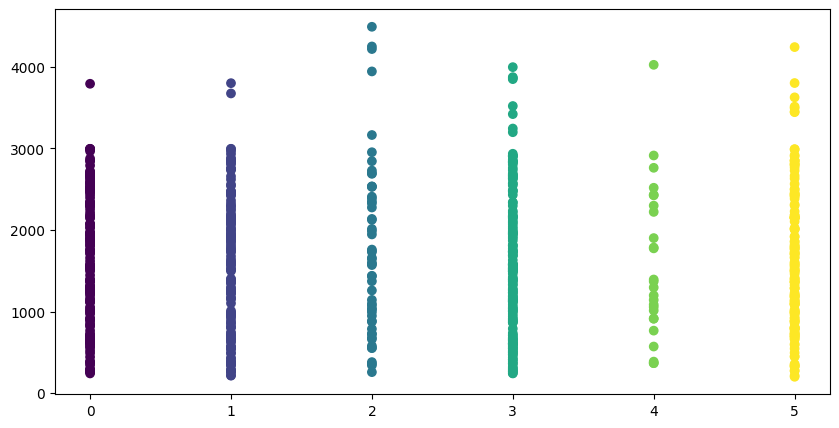

In [36]:
fig=plt.figure(figsize=(10,5))
plt.scatter(finance_cluster["cluster_ID_H"],finance_cluster["Units Sold"],c=ac.labels_)

# DBScan Clustering

In [37]:
array=finance_cluster.values
array

array([[ 1.61850e+03,  3.00000e+00,  2.00000e+01, ...,  2.75145e+04,
         4.00000e+00,  0.00000e+00],
       [ 1.32100e+03,  3.00000e+00,  2.00000e+01, ...,  2.24570e+04,
         4.00000e+00,  0.00000e+00],
       [ 2.17800e+03,  3.00000e+00,  1.50000e+01, ...,  2.61360e+04,
         2.00000e+00,  0.00000e+00],
       ...,
       [ 1.36800e+03,  5.00000e+00,  7.00000e+00, ...,  2.73600e+03,
         4.00000e+00,  1.00000e+00],
       [ 7.23000e+02,  1.00000e+01,  7.00000e+00, ..., -2.16900e+03,
         4.00000e+00,  2.00000e+00],
       [ 1.80600e+03,  2.50000e+02,  1.20000e+01, ..., -4.29828e+05,
         1.00000e+00,  3.00000e+00]])

In [38]:
from sklearn.preprocessing import StandardScaler
ss_d=StandardScaler()
ss_dfd=ss_d.fit_transform(array)
ss_dfd

array([[ 0.0117739 , -0.86134193, -0.72015048, ..., -0.0095924 ,
         1.32645002, -1.28592054],
       [-0.33143934, -0.86134193, -0.72015048, ..., -0.02649663,
         1.32645002, -1.28592054],
       [ 0.65724553, -0.86134193, -0.75673287, ..., -0.01419991,
        -0.01339849, -1.28592054],
       ...,
       [-0.27721741, -0.842913  , -0.8152647 , ..., -0.09241226,
         1.32645002, -0.73838746],
       [-1.0213268 , -0.79684067, -0.8152647 , ..., -0.10880677,
         1.32645002, -0.19085439],
       [ 0.22808477,  1.41463111, -0.77868231, ..., -1.5382176 ,
        -0.68332274,  0.35667869]])

In [52]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=2,min_samples=2)
dbs_f=dbs.fit_predict(ss_dfd)
dbs_f

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        0,  2,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
        0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [54]:
finance_cluster["cluster_ID_D"]=dbs.labels_
finance_cluster.tail(10)

<ipython-input-54-1a5134ca3d6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finance_cluster["cluster_ID_D"]=dbs.labels_


Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
690       267.0                  250          20       5340.0     801.00   
691      1175.0                  250          15      17625.0    2643.75   
692      2954.0                  250         125     369250.0   55387.50   
693       552.0                  250         125      69000.0   10350.00   
694       293.0                  250          20       5860.0     879.00   
695      2475.0                  260         300     742500.0  111375.00   
696       546.0                  260         300     163800.0   24570.00   
697      1368.0                    5           7       9576.0    1436.40   
698       723.0                   10           7       5061.0     759.15   
699      1806.0                  250          12      21672.0    3250.80   

         COGS    Profit  cluster_ID_K  cluster_ID_H  cluster_ID_D  
690    2670.0  -61410.0             1             3             0  
691   11750.0 -276125.0             1             3             0  
692  354480.0 -369250.0             1             2             0  
693   66240.0  -69000.0             1             2             0  
694    2930.0  -67390.0             1             3             0  
695  618750.0   99000.0             3             1             1  
696  136500.0   21840.0             0             1             0  
697    6840.0    2736.0             4             1             0  
698    3615.0   -2169.0             4             2             0  
699    5418.0 -429828.0             1             3             0

In [55]:
finance_cluster.sort_values(by="cluster_ID_D")

Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
423      3793.5                  120         300    1138050.0  102424.50   
47       4219.5                  260         125     527437.5       0.00   
449       360.0                  250           7       2520.0     226.80   
450      2682.0                  250          20      53640.0    4827.60   
451       521.0                  250           7       3647.0     328.23   
..          ...                  ...         ...          ...        ...   
67       2155.0                    3         350     754250.0    7542.50   
632      2227.5                    5         350     779625.0  109147.50   
380      2146.0                   10         350     751100.0   60088.00   
579      1790.0                    3         350     626500.0   81445.00   
413      2565.0                   10         300     769500.0   69255.00   

         COGS    Profit  cluster_ID_K  cluster_ID_H  cluster_ID_D  
423  948375.0  682830.0             3             0            -1  
47   506340.0 -569632.5             1             2            -1  
449    1800.0  -87480.0             1             3             0  
450   26820.0 -616860.0             1             3             0  
451    2605.0 -126603.0             1             3             0  
..        ...       ...           ...           ...           ...  
67   560300.0  747785.0             3             5             2  
632  579150.0  768487.5             3             5             2  
380  557960.0  729640.0             3             5             2  
579  465400.0  621130.0             3             5             2  
413  641250.0  743850.0             3             5             2  

[700 rows x 10 columns]

In [56]:
finance_cluster[finance_cluster["cluster_ID_D"]==-1]

Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
47       4219.5                  260         125     527437.5        0.0   
423      3793.5                  120         300    1138050.0   102424.5   

         COGS    Profit  cluster_ID_K  cluster_ID_H  cluster_ID_D  
47   506340.0 -569632.5             1             2            -1  
423  948375.0  682830.0             3             0            -1

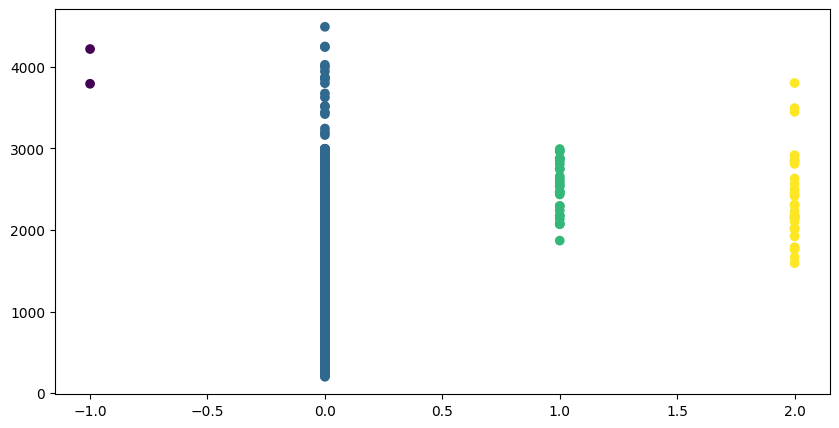

In [57]:
fig=plt.figure(figsize=(10,5))
plt.scatter(finance_cluster["cluster_ID_D"],finance_cluster["Units Sold"],c=dbs.labels_)